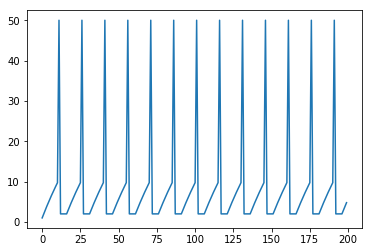

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# input current
I = 1 # nA

# capacitance and leak resistance
C = 1 # nF
R = 40 # M ohms

# I & F implementation dV/dt = - V/RC + I/C
# Using h = 1 ms step size, Euler method

V = 0
tstop = 200
abs_ref = 5 # absolute refractory period 
ref = 0 # absolute refractory period counter
V_trace = []  # voltage trace for plotting
V_th = 10 # spike threshold
spiketimes = [] # list of spike times

# input current
noiseamp = 0 # amplitude of added noise
I += noiseamp*np.random.normal(0, 1, (tstop,)) # nA; Gaussian noise

for t in range(tstop):
  
   if not ref:
       V = V - (V/(R*C)) + (I[t]/C)
   else:
       ref -= 1
       V = 0.2 * V_th # reset voltage
   
   if V > V_th:
       V = 50 # emit spike
       ref = abs_ref # set refractory counter

   V_trace += [V]


plt.plot(V_trace)
plt.show()

In [24]:
def histogram(noiseamp):
    # input current
    I = 1 # nA

    # capacitance and leak resistance
    C = 1 # nF
    R = 40 # M ohms

    # I & F implementation dV/dt = - V/RC + I/C
    # Using h = 1 ms step size, Euler method

    V = 0
    tstop = 10000
    abs_ref = 5 # absolute refractory period 
    ref = 0 # absolute refractory period counter
    V_trace = []  # voltage trace for plotting
    V_th = 10 # spike threshold
    spiketimes = [] # list of spike times

    # input current
    I += noiseamp*np.random.normal(0, 1, (tstop,)) # nA; Gaussian noise

    for t in range(tstop):

        if not ref:
           V = V - (V/(R*C)) + (I[t]/C)
        else:
           ref -= 1
           V = 0.2 * V_th # reset voltage

        if V > V_th:
           V = 50 # emit spike
           ref = abs_ref # set refractory counter
        V_trace += [V]

    spike_interval= []
    index=0
    for i in range(len(V_trace)):
        if V_trace[i]==50:
            spike_interval.append(i-index)
            index=i
    plt.hist(spike_interval)
    plt.show()


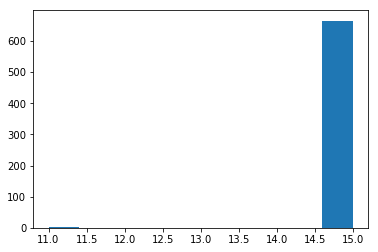

In [25]:
histogram(0)

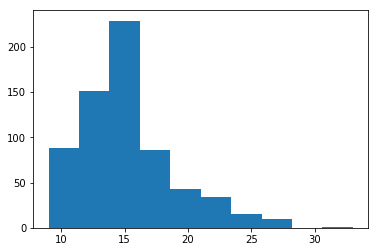

In [26]:
histogram(1)

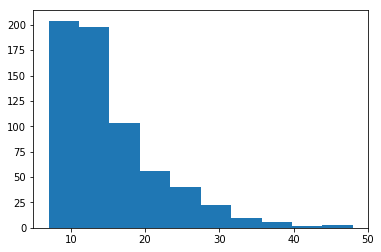

In [27]:
histogram(2)

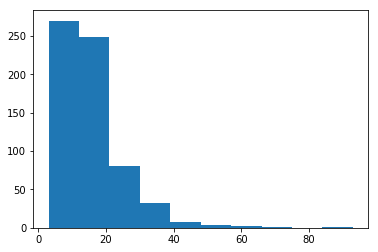

In [28]:
histogram(3)

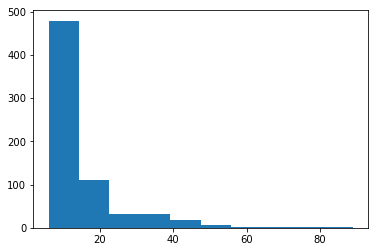

In [29]:
histogram(4)

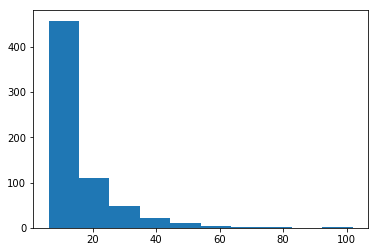

In [30]:
histogram(5)